In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
kampala_data = pd.read_csv('./data/completeness_table_above_75_10_09_2020.csv')
kampala_data.head()

,Parish,Latitude,Longitude,Mean PM 2.5,Median PM 2.5,25th Percentile,75th Percentile,No. of hourly measurements,6-Month Completeness (%)
0,Nakasero II(2),0.322320,32.575700,37.7,35.9,19.7,48.4,4349,99.57
1,Kansanga,0.298750,32.615000,32.7,30.6,15.6,43.8,4311,98.70
2,Nansana East,0.375900,32.528000,62.4,51.7,36.0,79.8,4093,93.70
3,Lubaga,0.295314,32.553682,52.1,45.6,32.1,63.8,4055,92.83
4,Nansana West,0.363000,32.529000,57.7,48.6,36.7,70.3,4053,92.79


In [16]:
#uses euclidean distance
'''euclidean_distance_df = pd.DataFrame(squareform
                                     (pdist
                                      (kampala_data.iloc[:, 1:3])), 
                                     columns=kampala_data.Parish.unique(), 
                                     index=kampala_data.Parish.unique())'''
my_pdist = pdist(kampala_data.iloc[:, 1:3])
#my_square = np.round(squareform(my_pdist), 3)
my_square = squareform(my_pdist)
euclidean_distance_df = pd.DataFrame(my_square, columns=kampala_data.Parish.unique(), index=kampala_data.Parish.unique())
rounded_euclidean_df = euclidean_distance_df.round(3)
rounded_euclidean_df

,Nakasero II(2),Kansanga,Nansana East,Lubaga,Nansana West,Lukuli(2),Bugolobi,Kyaliwajjala,Seguku,Kiwafu,Kiwatule,Civic Centre,Makindye I
Nakasero II(2),0.000,0.046,0.072,0.035,0.062,0.046,0.047,0.093,0.089,0.287,0.073,0.017,0.036
Kansanga,0.046,0.000,0.116,0.061,0.107,0.021,0.010,0.089,0.085,0.285,0.075,0.029,0.028
Nansana East,0.072,0.116,0.000,0.085,0.013,0.117,0.115,0.119,0.143,0.323,0.100,0.088,0.106
Lubaga,0.035,0.061,0.085,0.000,0.072,0.048,0.068,0.127,0.060,0.254,0.108,0.041,0.036
Nansana West,0.062,0.107,0.013,0.072,0.000,0.107,0.107,0.120,0.131,0.311,0.100,0.078,0.095
Lukuli(2),0.046,0.021,0.117,0.048,0.107,0.000,0.032,0.109,0.064,0.264,0.094,0.032,0.012
Bugolobi,0.047,0.010,0.115,0.068,0.107,0.032,0.000,0.079,0.096,0.295,0.066,0.031,0.037
Kyaliwajjala,0.093,0.089,0.119,0.127,0.120,0.109,0.079,0.000,0.171,0.372,0.021,0.088,0.109
Seguku,0.089,0.085,0.143,0.060,0.131,0.064,0.096,0.171,0.000,0.201,0.154,0.085,0.062
Kiwafu,0.287,0.285,0.323,0.254,0.311,0.264,0.295,0.372,0.201,0.000,0.356,0.286,0.263


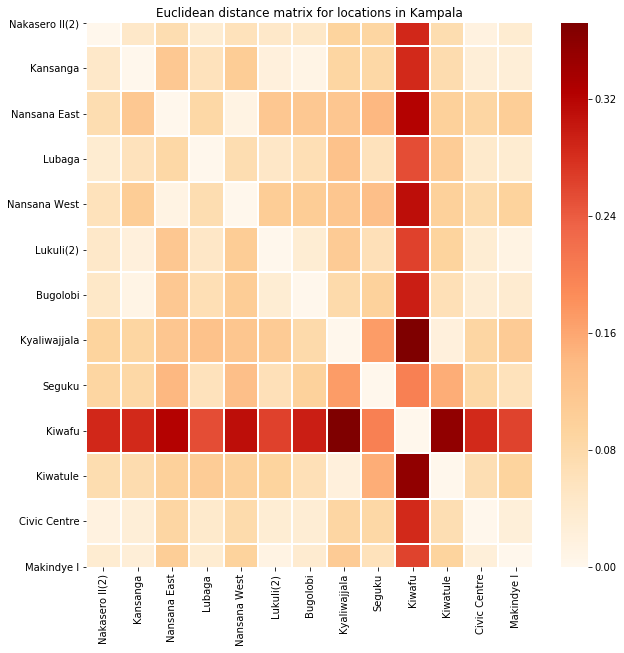

In [17]:
#Plotting using seaborn
plt.figure(figsize=(10,10))
plt.title('Euclidean distance matrix for locations in Kampala')
sns.heatmap(rounded_euclidean_df, cmap='OrRd', linewidth=1)
plt.savefig('eulidean_heatmap.png')

In [18]:
#using haversine
from sklearn.neighbors import DistanceMetric
from math import radians

In [19]:
dist = DistanceMetric.get_metric('haversine')

In [21]:
kampala_data_hv = kampala_data.copy()
kampala_data_hv['Latitude'] = np.radians(kampala_data_hv['Latitude'])
kampala_data_hv['Longitude'] = np.radians(kampala_data_hv['Longitude'])
myArray = kampala_data_hv[['Latitude','Longitude']].to_numpy()#input to dist.pairwise() is numpy array
myPairwiseArray = dist.pairwise(kampala_data_hv [['Latitude','Longitude']].to_numpy())*6373 #multiplying by 6373 to get the distance in km
haversine_distance_df = pd.DataFrame(myPairwiseArray, columns=kampala_data_hv.Parish.unique(), index=kampala_data_hv.Parish.unique())
rounded_haversine_df = haversine_distance_df.round(3)
rounded_haversine_df

,Nakasero II(2),Kansanga,Nansana East,Lubaga,Nansana West,Lukuli(2),Bugolobi,Kyaliwajjala,Seguku,Kiwafu,Kiwatule,Civic Centre,Makindye I
Nakasero II(2),0.000,5.097,7.979,3.876,6.889,5.085,5.259,10.321,9.845,31.916,8.125,1.840,3.991
Kansanga,5.097,0.000,12.934,6.831,11.940,2.371,1.156,9.881,9.484,31.679,8.397,3.257,3.089
Nansana East,7.979,12.934,0.000,9.408,1.439,13.021,12.805,13.263,15.943,35.978,11.152,9.745,11.809
Lubaga,3.876,6.831,9.408,0.000,8.014,5.314,7.566,14.144,6.649,28.200,11.982,4.543,3.991
Nansana West,6.889,11.940,1.439,8.014,0.000,11.848,11.913,13.298,14.517,34.601,11.093,8.703,10.597
Lukuli(2),5.085,2.371,13.021,5.314,11.848,0.000,3.510,12.092,7.115,29.362,10.436,3.560,1.363
Bugolobi,5.259,1.156,12.805,7.566,11.913,3.510,0.000,8.751,10.624,32.835,7.343,3.480,4.073
Kyaliwajjala,10.321,9.881,13.263,14.144,13.298,12.092,8.751,0.000,19.037,41.403,2.303,9.841,12.158
Seguku,9.845,9.484,15.943,6.649,14.517,7.115,10.624,19.037,0.000,22.376,17.183,9.427,6.882
Kiwafu,31.916,31.679,35.978,28.200,34.601,29.362,32.835,41.403,22.376,0.000,39.554,31.761,29.256


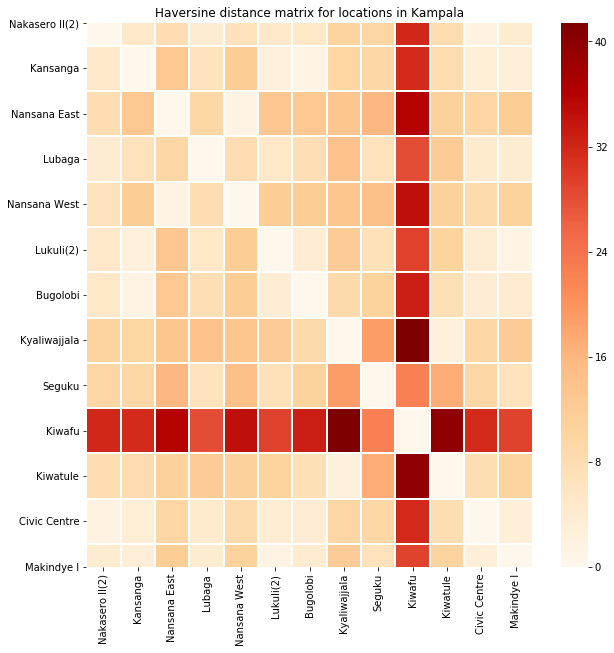

In [22]:
#Plotting using seaborn
plt.figure(figsize=(10,10))
plt.title('Haversine distance matrix for locations in Kampala')
sns.heatmap(haversine_distance_df, cmap='OrRd',linewidth=1)
plt.savefig('haversine_heatmap.png')